# ナイーブベイズ演習 迷惑メールの振り分け

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../../mltestdata/SMSSpamCollection', sep='\t', names = ["label", "message"])

In [3]:
df.isnull().any()

label      False
message    False
dtype: bool

In [4]:
df.count()

label      5572
message    5572
dtype: int64

In [5]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df['label'] = df['label'].map({'ham':0,'spam':1}).astype(int)

In [7]:
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
messages = ['Thank you for calling.',
            'Thank you for your inquiry',
            'Thanks for keeping in touch.',
            'Thanks for getting in touch with me?']

In [9]:
d = dict({})

for message in messages:
    word_set = message.split(" ")
    word_set = list(map(lambda x: x.replace(".",""), word_set))
    
    for word in word_set:
        if word not in d:
            d[word] = 1
        else:
            d[word] = d[word] + 1 

print(d)

{'Thank': 2, 'you': 2, 'for': 4, 'calling': 1, 'your': 1, 'inquiry': 1, 'Thanks': 2, 'keeping': 1, 'in': 2, 'touch': 2, 'getting': 1, 'with': 1, 'me?': 1}


In [10]:
len(d)

13

# Bag of wordsを体験する

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [12]:
tf_vectorizer = CountVectorizer()
tf_vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [13]:
tf_vectorizer.fit(messages)
tf_vectorizer.vocabulary_

{'calling': 0,
 'for': 1,
 'getting': 2,
 'in': 3,
 'inquiry': 4,
 'keeping': 5,
 'me': 6,
 'thank': 7,
 'thanks': 8,
 'touch': 9,
 'with': 10,
 'you': 11,
 'your': 12}

In [14]:
data = tf_vectorizer.transform(messages)

In [15]:
data.todense()

matrix([[1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0],
        [0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1],
        [0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0],
        [0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0]])

# 実践

### 前処理

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['message'],df['label'],test_size=0.2,random_state=1)

In [17]:
tf_vectorizer = CountVectorizer()
tf_vectorizer.fit(X_train)
tf_vectorizer.vocabulary_

X_train= tf_vectorizer.transform(X_train)
X_test = tf_vectorizer.transform(X_test)

### モデル実装・学習

In [18]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

- Accuracy
- Precision
- Recall
- F1 Score(f-score)

In [19]:
y_pred = clf.predict(X_test)
y_true = y_test

In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_pred)

array([[965,   3],
       [  8, 139]])

読み方注意。
- 縦に読む（一行目が分類0、二行目が分類1）
- 横に読むとどこに誤って分類されてしまったかを見る。

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: ', format(accuracy_score(y_test, predictions)))
print('Precision score: ', format(precision_score(y_test, predictions)))
print('Recall score: ', format(recall_score(y_test, predictions)))
print('F1 score: ', format(f1_score(y_test, predictions)))

In [106]:
print('Train score: {}'.format(clf.score(X_train, y_train)))
print('Test score: {}'.format(clf.score(X_test, y_test)))

Train score: 0.9923715503702042
Test score: 0.9901345291479821


In [107]:

print(classification_report(y_true, y_pred))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99       968
          1       0.98      0.95      0.96       147

avg / total       0.99      0.99      0.99      1115



* * * * * * 

In [74]:
import numpy as np
X = np.random.randint(5, size=(6, 100))
y = np.array([1, 2, 3, 4, 5, 6])
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X, y)
print(clf.predict(X[2:3]))

[3]


# 【AIコース】ナイーブベイズ1 体験してみる

In [13]:
# マイナスの値がある場合が1、プラスの値がある場合が２

In [3]:
# テストデータの生成
import numpy as np
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
Y = np.array([1, 1, 1, 2, 2, 2])

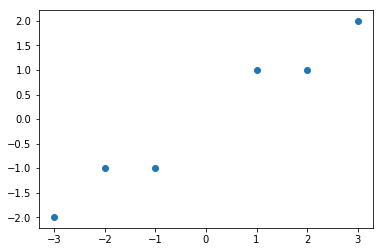

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X[:,0],X[:,1])

In [7]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X, Y)

GaussianNB(priors=None)

In [8]:
print(clf.predict([[-0.8, -1]]))

[1]


In [12]:
clf.score(X, Y)

1.0

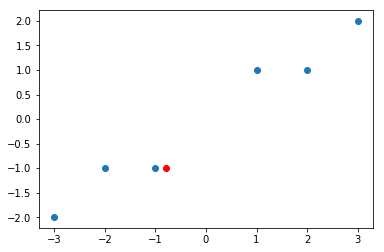

In [9]:
plt.scatter(X[:,0],X[:,1])
plt.scatter(-0.8,-1 ,color="r")

In [10]:
X_test = np.array([[-0.6, -0.6], [-1, -2], [-2.5, -2], [1.2, 1.5], [2.1, 1.3], [3.1, 2.2]])
Y_test = np.array([1, 1, 1, 2, 2, 2])

In [11]:
clf.score(X_test, Y_test)

1.0